# Titanic Data Dictionary

- **PassengerId** : 탑승객의 고유 아이디
- **Survived** - 생존유무, target 값. (0 = 사망, 1 = 생존)
- **Name** - 탑승객 성명
- **Pclass** - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
- **Sex** - 성별
- **Age** - 나이(세)
- **SibSp** - 함께 탑승한 형제자매, 배우자 수 총합
- **Parch** - 함께 탑승한 부모, 자녀 수 총합
- Embarked - 탑승 항구 (C = Cherbourg, Q = Queenstown, S = Southampton)
- Fare - 탑승 요금
- Ticket - 티켓 넘버
- Cabin - 객실 넘버

# Titanic Data 불러오기

- 분석에 필요한 라이브러리(패키지)

In [54]:
'''1'''
# 과제 예시) 필요한 라이브러리를 불러오기
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('Pastel2')
# https://seaborn.pydata.org/tutorial/color_palettes.html

#ignore warnings - 필요없는 경고 메시지 표시 X
import warnings
warnings.filterwarnings('ignore')

- 데이터 불러오기 및 확인

In [57]:
'''2'''
# 데이터 파일을 불러오기
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [59]:
'''3'''
# 학습 데이터셋의 첫 몇(5개) 행 확인
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
'''4'''
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Titanic Data 개요 파악

### 1. 행과 컬럼의 수

In [65]:
'''5'''
###표본데이터
print(df_train.shape)  
print(df_test.shape)  

(891, 12)
(418, 11)


In [67]:
'''6'''
891 + 418

1309

<span style = "color:red"> Q1. train과 달리 Survived 컬럼이 없습니다. 그 이유는 무엇일까요?


In [70]:
'''7'''
### 답
### 여기에 답을 작성하시오.
#train데이터는 학습데이터 대상이지만, test데이터는 학습대상이 아니므로 정답을 도출해야함
###모델성능은 어떻게 확인할까?
# train데이터도 학습을 위한 값과,검증을 위한 데이터로 나뉘는데, 모두 서바이벌 데이터가 존재

'7'

### 2. 데이터셋의 정보와 결측치

#### train 데이터

In [74]:
'''8'''
###info 는 column 의  정보를 알려줌(ex:결측지가 아닌값,type)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
'''9'''
###결측지면 =True/ 결측지가 아니면 =False
df_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [78]:
'''10'''
### cabin의 결측지가 제일 많음-->사용하기 무리임
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [80]:
'''11'''
891 - 714 

177

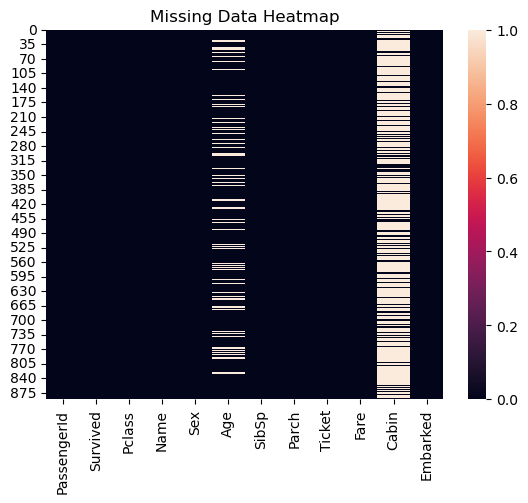

In [82]:
'''12'''

sns.heatmap(df_train.isnull())   # 현재는 cbar=True로 되어 있는 상태
plt.title('Missing Data Heatmap')
plt.show()

#### test 데이터

In [85]:
'''13'''
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [87]:
'''14'''
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 3. 통계량

In [90]:
'''15'''
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 4. 컬럼 (피처) 별 상관분석

In [95]:
'''16'''
#연속형 변수만 추출
continuous_columns = df_train.select_dtypes(include= ['float64', 'int64']).columns
continuous_df = df_train[continuous_columns]
continuous_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [97]:
'''17'''
#상관계수계산= default:피어슨 ###참고) 데이터프레임명.corr(method='spearman')
corr = continuous_df.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


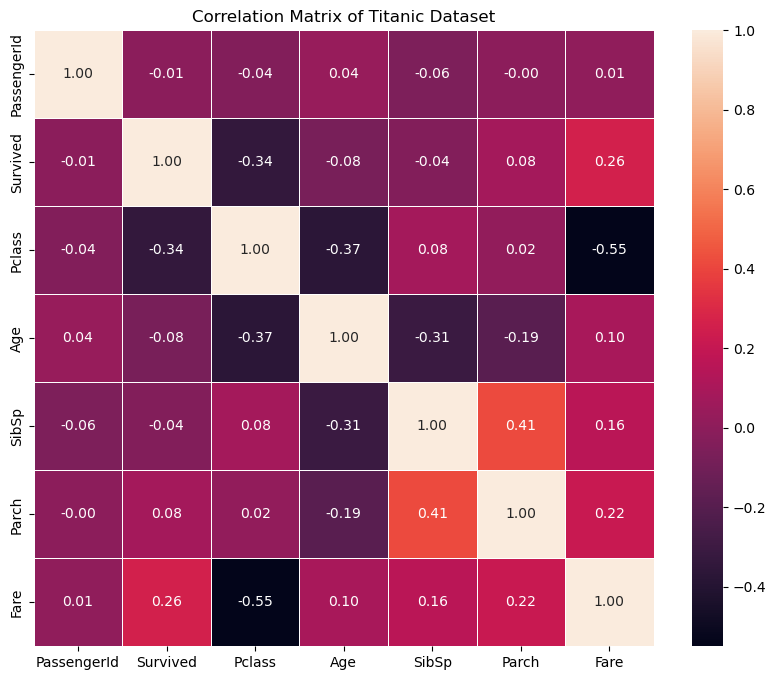

In [99]:
'''18'''
#상관관계 시각화 - 히트맵 유용
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True,fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()

<span style = "color:red"> 
Q2-1. 상관관계가 가장 낮은 두 개의 컬럼 이름은 무엇인가요? / 그 이유는 무엇일까요?

In [102]:
'''19'''
### 답
#상관관계가 높은 데이터는 유용함
# 여기에 답을 작성하시오. #Pclass와  Fare
###상관관계가 0에 가까울수록 상관관계가 낮으므로 passengerld&parch이다

'19'

<span style = "color:red"> 
Q2-2. 상관관계가 가장 높은 두 개의 컬럼 이름은 무엇인가요? / 그 이유는 무엇일까요?


In [105]:
'''20'''
### 답
# 여기에 답을 작성하시오. #SibSp, Parch
###pclass와 fare로 상관관계의 절댓값이 가장 크고, 음의 상관관계이다.

'20'

# Column 별 전처리 및 시각화
지금부터는 각 Feature 별로 분석을 진행해 봅시다!

### 1. PassengerId : 탑승객의 고유 아이디


In [109]:
'''21'''
#고유값 확인   set과 비슷: 겹치는 수를 지워줌
df_train['PassengerId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [111]:
'''22'''
#고유값 개수확인(빈도수)
df_train['PassengerId'].nunique()

891

### 2. Survived : 생존유무

In [114]:
'''23'''

df_train['Survived'].unique()

array([0, 1], dtype=int64)

In [116]:
'''24'''
#고유값별 개수 확인
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [118]:
'''25'''

survived_counts = df_train['Survived'].value_counts()
survived_counts

Survived
0    549
1    342
Name: count, dtype: int64

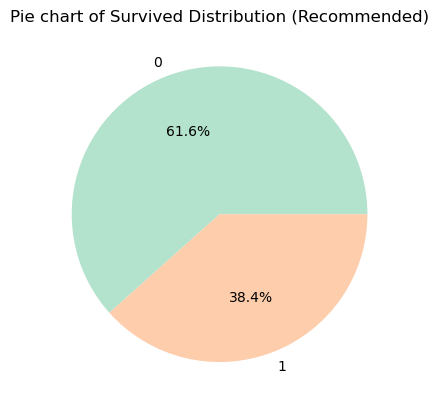

In [120]:
'''26'''


plt.pie(survived_counts, labels= survived_counts.index, autopct='%1.1f%%')
plt.title('Pie chart of Survived Distribution (Recommended)')
plt.show() 

In [121]:
'''27'''
#시각화 전처리 / 생존 유무 분포
display(df_train['Survived'].value_counts().to_frame(),
        df_train['Survived'].value_counts().to_frame().T)

,count
Survived,
0,549
1,342


Survived,0,1
count,549,342


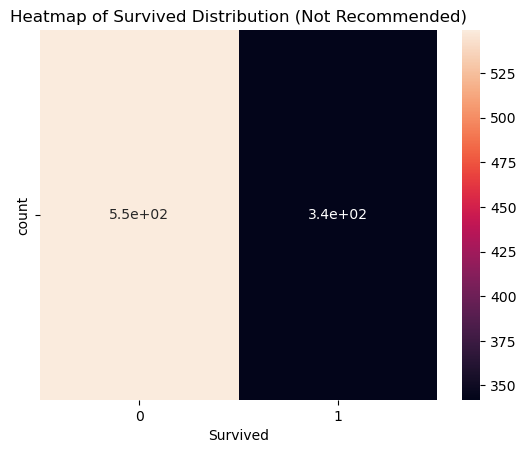

In [124]:
'''28'''



survived_counts = df_train['Survived'].value_counts().to_frame().T

sns.heatmap(survived_counts, annot=True)
plt.title('Heatmap of Survived Distribution (Not Recommended)')
plt.show()

### 3. Name : 탑승객 성명

In [126]:
'''29'''
#고유값 확인
df_train['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [127]:
'''30'''

df_train['Title']=""

for i in range(len(df_train['Name'])):
    full_name = df_train['Name'][i]  # 1. 현재 행의 전체 이름
    print(f"Full name:{full_name}")

    last_name = full_name.split(',')[1]  # 2. 이름을 콤마(,)로 나눈 후 두 번째 부분
    title = last_name.split('.')[0]      # 3. 두 번째 부분을 점(.)으로 나누고 첫 번째 부분을 추출
    df_train['Title'][i] = title.lower()  # 4. 추출된 호칭을 소문자로 변환하여 'title' 열에 저장합니다.
    print(f"Last_name:{last_name} / Title:{title}")
    print()


Full name:Braund, Mr. Owen Harris
Last_name: Mr. Owen Harris / Title: Mr

Full name:Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Last_name: Mrs. John Bradley (Florence Briggs Thayer) / Title: Mrs

Full name:Heikkinen, Miss. Laina
Last_name: Miss. Laina / Title: Miss

Full name:Futrelle, Mrs. Jacques Heath (Lily May Peel)
Last_name: Mrs. Jacques Heath (Lily May Peel) / Title: Mrs

Full name:Allen, Mr. William Henry
Last_name: Mr. William Henry / Title: Mr

Full name:Moran, Mr. James
Last_name: Mr. James / Title: Mr

Full name:McCarthy, Mr. Timothy J
Last_name: Mr. Timothy J / Title: Mr

Full name:Palsson, Master. Gosta Leonard
Last_name: Master. Gosta Leonard / Title: Master

Full name:Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
Last_name: Mrs. Oscar W (Elisabeth Vilhelmina Berg) / Title: Mrs

Full name:Nasser, Mrs. Nicholas (Adele Achem)
Last_name: Mrs. Nicholas (Adele Achem) / Title: Mrs

Full name:Sandstrom, Miss. Marguerite Rut
Last_name: Miss. Marguerite Rut / Title: M

<Axes: xlabel='count', ylabel='Title'>

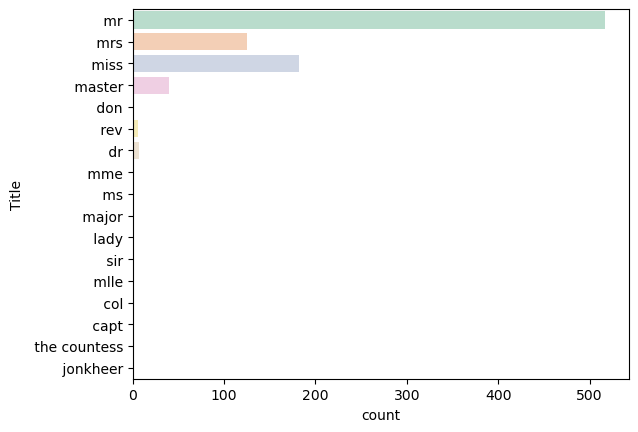

In [129]:
'''31'''
#호칭에 따른 countplot
sns.countplot(y='Title',data=df_train, palette='Pastel2')
#남자가 많음을 알 수 있음

### 4. Sex : 성별

In [132]:
'''32'''
#성별분포
df_train[['Sex']]

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


### 4-1. 성별 분포

In [134]:
'''33'''

sex_counts = df_train['Sex'].value_counts()
sex_counts

Sex
male      577
female    314
Name: count, dtype: int64

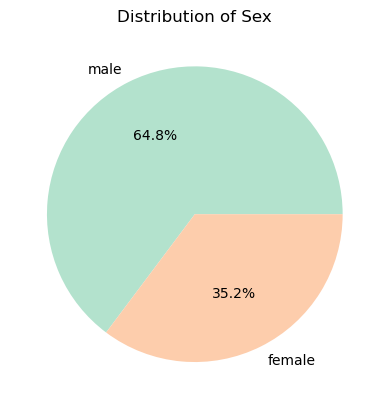

In [136]:
'''34'''



plt.pie(sex_counts, labels= sex_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Sex')
plt.show()

### 4-2. 성별에 따른 생존율 평균 분포


In [138]:
'''35'''
#성별에 따른 생존율 평균
#Groupby를 이용한 Sex에 따른 Survived의 평균
df_train[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


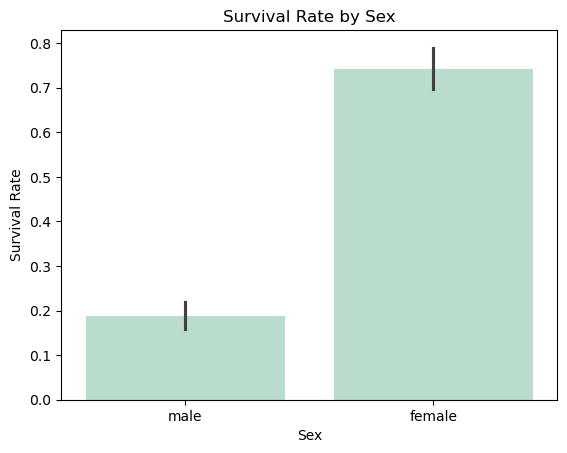

In [139]:
'''36'''
#성별에 따른 생존율 평균 시각화
sns.barplot(x='Sex', y='Survived', data=df_train)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()
#검은 선은 신뢰구간+-5% ->모수값이 95%확률// 검은선이 짧을 수록 정확도 높음

### 4-3. 생존-사망에 따른 성별 분포


In [142]:
'''37'''


#died
#사망했을 경우 성별과, 생존여부
display(df_train[ df_train['Survived'] == 0 ][['Sex', 'Survived']])
died_df = df_train[ df_train['Survived'] == 0 ][['Sex']] #0
died_counts = died_df.value_counts()
died_counts

,Sex,Survived
0,male,0
4,male,0
5,male,0
6,male,0
7,male,0
...,...,...
884,male,0
885,female,0
886,male,0
888,female,0


Sex   
male      468
female     81
Name: count, dtype: int64

In [143]:
'''38'''


# survived
#생존했을 경우 성별과 생존여부
display(df_train[ df_train['Survived'] == 1 ][['Sex', 'Survived']])
survived_df = df_train[ df_train['Survived'] == 1 ][['Sex']] #1
survived_counts = survived_df.value_counts()
survived_counts

,Sex,Survived
1,female,1
2,female,1
3,female,1
8,female,1
9,female,1
...,...,...
875,female,1
879,female,1
880,female,1
887,female,1


Sex   
female    233
male      109
Name: count, dtype: int64

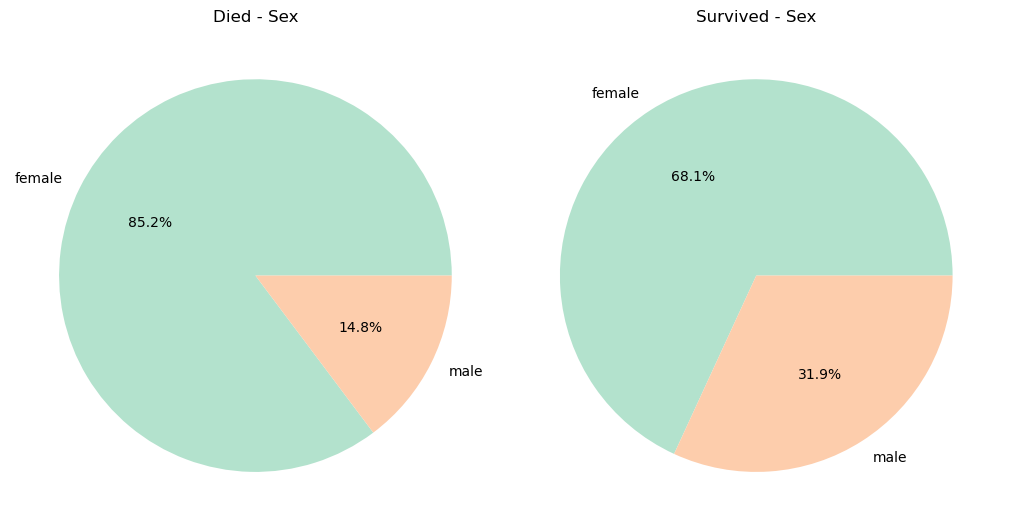

In [145]:
'''39'''

fig, ax = plt.subplots(1,2,figsize=(10,6), constrained_layout=True)
labels = ['female', 'male']
 
#Survived 가 0인 데이터를 이용한 Pie Plot
died_counts.plot.pie(ax=ax[0], autopct='%1.1f%%', labels=labels)
ax[0].set(ylabel='', title='Died - Sex')
 
#Survived 가 1인 데이터를 이용한 Pie Plot
df_train[df_train['Survived'] == 1]['Sex'].value_counts().plot.pie(ax=ax[1], autopct='%1.1f%%', labels=labels)
ax[1].set(ylabel='', title='Survived - Sex')
 
plt.show()

### 5. SibSp : 함께 탑승한 형제자매, 배우자 수 총합

In [148]:
'''40'''
df_train[['SibSp']]

,SibSp
0,1
1,1
2,0
3,1
4,0
...,...
886,0
887,0
888,1
889,0


In [150]:
'''41'''
#형제 자매 배우자의 수에 대한 분포
sibsp_counts = df_train['SibSp'].value_counts()
sibsp_counts

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

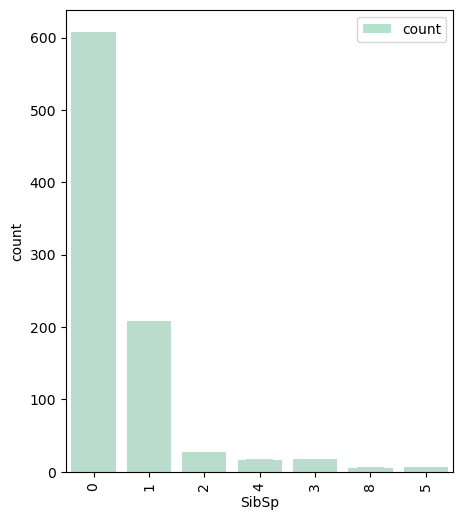

In [152]:
'''43'''
#sibsp에 따른 생존율 평균
#Groupby를 이용한 sibsp에 따른 survived의 평균
sibsp_counts.plot(kind='bar', figsize=(5,6))
sns.countplot(data=df_train, x='SibSp')
plt.show()

In [153]:
'''43'''
#sibsp에 따른 생존율 평균
#groupby를 이용한 sibsp에 따른 평균

df_train[['SibSp', 'Survived']].groupby('SibSp').mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


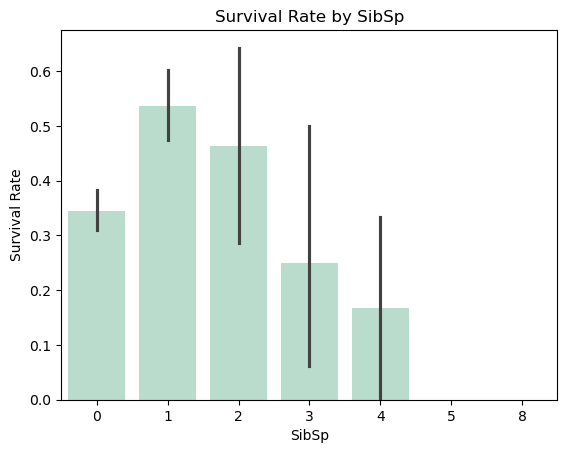

In [154]:
'''44'''
#형제자매와 배우자의 수에따른 생존율 평균 시각화
sns.barplot(x='SibSp', y='Survived', data=df_train)
plt.title('Survival Rate by SibSp')
plt.xlabel('SibSp')
plt.ylabel('Survival Rate')
plt.show()

### 6. Parch : 함께 탑승한 부모, 자녀 수 총합

In [157]:
'''45'''

df_train[['Parch']]

,Parch
0,0
1,0
2,0
3,0
4,0
...,...
886,0
887,0
888,2
889,0


In [158]:
'''40'''
#부모와 자녀수에 대한 분포
parch_counts = df_train['Parch'].value_counts()
parch_counts

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

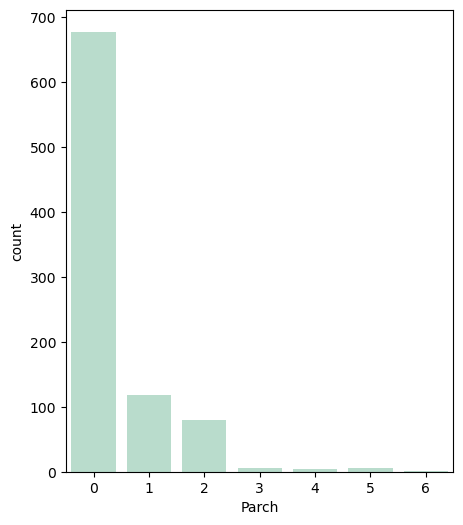

In [159]:
'''46'''
#부모와 자녀의 수에 대한 시각화
fig, ax = plt.subplots(figsize=(5,6))
sns.countplot(data=df_train, x='Parch')
plt.show()

In [162]:
'''47'''
#parch에 따른 생존율 평균
#Groupby를 이용한 parch에 따른 survived의 평균

df_train[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


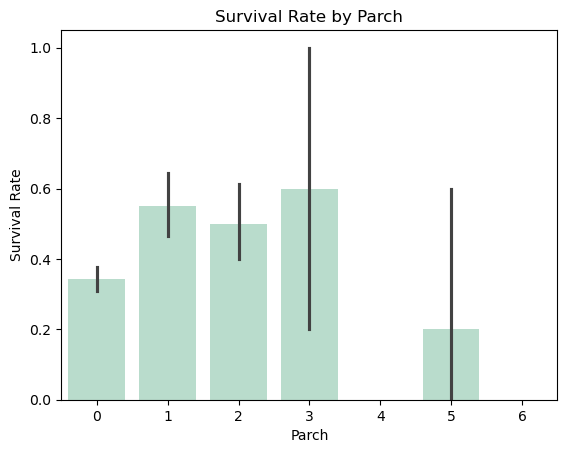

In [163]:
'''48'''
#부모와 자녀의 수에 대한 시각화
sns.barplot(x='Parch', y='Survived', data=df_train)
plt.title('Survival Rate by Parch')
plt.xlabel('Parch')
plt.ylabel('Survival Rate')
plt.show()